In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import norm
import math
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import t

In [91]:
df=pd.read_csv(r"C:\Users\Baskar\OneDrive\Desktop\Statistics using python,c8\DS1_C8_Computers_Data_Project.csv")
df.head()

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
3,4,1849,25,170,8,14,no,no,no,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1


In [5]:
# Data Preprocessing:
df.isnull().sum()

index       0
price       0
speed       0
hd          0
ram         0
screen      0
cd          0
multi       0
premium     0
ads_2022    0
ads_2023    0
trend       0
dtype: int64

In [7]:
df[df.duplicated(keep='first')]
# Interpretation:
# There is no null values and duplicate values.

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend


In [5]:
df.dtypes
# There is no need to replace any data types.

index        int64
price        int64
speed        int64
hd           int64
ram          int64
screen       int64
cd          object
multi       object
premium     object
ads_2022     int64
ads_2023     int64
trend        int64
dtype: object

# Business Objectives:
# Enhance Product Strategy and Sales Performance through Specification-based analysis:
# Task-1(a) Analyze purchase likelihood based on specifications:

# What is the probability of customer purchasing computer with atleast 8GB ram,screen size 14 inch,speed exceeding 33 MHz?

In [65]:
prop=df[(df['ram']==8)&(df['screen']==14)&(df['speed']>33)][['ram','screen','speed']]
prop

,ram,screen,speed
8,8,14,50
11,8,14,66
14,8,14,50
19,8,14,66
24,8,14,50
...,...,...,...
6238,8,14,66
6240,8,14,100
6246,8,14,66
6247,8,14,100


In [65]:
prop_of_ram=784/6259
prop_of_screen=784/6259
prop_of_speed=784/6259

print(f'Probability of Ram: {prop_of_ram}\nProbability of Screen: {prop_of_screen}\nProbability of Speed: {prop_of_speed}')

Probability of Ram: 0.12525962613836075
Probability of Screen: 0.12525962613836075
Probability of Speed: 0.12525962613836075


In [84]:
df.loc[:,'ram'].count()

6259

In [86]:
df.loc[:,'screen'].count()

6259

In [88]:
df.loc[:,'speed'].count()

6259

In [67]:
prop.count()

ram       784
screen    784
speed     784
dtype: int64

# b)Probability of Selling Premium Computers:
# I)What is the probability of selling a premium computer?

In [104]:
df.loc[:,'premium'].count()

6259

In [123]:
premium=df[df.premium=='yes']['premium']
print(premium)
print('=================================')
print('Count of Premium Computers (yes)=',premium.count())

0       yes
1       yes
2       yes
4       yes
5       yes
       ... 
6254    yes
6255    yes
6256    yes
6257    yes
6258    yes
Name: premium, Length: 5647, dtype: object
Count of Premium Computers (yes)= 5647


In [127]:
prop_of_premium_comp=5647/6259
print(f'Prop_of_premium_comp:{prop_of_premium_comp:}')

Prop_of_premium_comp:0.9022208020450552


# II) Given that the computer is premium,what is the probability that it has a CD Player?
# Conditional Probability:

In [186]:
premium_cd=df[(df.premium=='yes')&(df['cd']=='yes')][['premium','cd']]
premium_cd
print(premium_cd.count())

print('==========================')
print(premium_cd)

prop_of_cd=df[df['premium']=='yes']
print('==========================')
print('Probability of Cd',prop_of_cd.count())

premium    2824
cd         2824
dtype: int64
     premium   cd
6        yes  yes
30       yes  yes
63       yes  yes
70       yes  yes
77       yes  yes
...      ...  ...
6253     yes  yes
6255     yes  yes
6256     yes  yes
6257     yes  yes
6258     yes  yes

[2824 rows x 2 columns]
Probability of Cd index       5647
price       5647
speed       5647
hd          5647
ram         5647
screen      5647
cd          5647
multi       5647
premium     5647
ads_2022    5647
ads_2023    5647
trend       5647
dtype: int64


In [ ]:
# Conditional probability:
Probability of A/B= P(A & B)/P(B)

In [188]:
prop_premium_cd=2824/5647
print('Probability of Premium and CD Player=',prop_premium_cd)

Probability of Premium and CD Player= 0.5000885425889853


# C)Predicting the probability of certain specifications:
# I) What is the probability of a computer having a screen size greater than 15 inches and being premium?
# Probability of two different events:(Join probability):

In [226]:
screen_premium=df[(df['screen']>15)&(df['premium']=='yes')][['screen','premium']]
print('Count of Screen and Premium=',screen_premium.count())

prob_of_screen_pre=530/6259  #(count of both screen and premium/total sample)
print('Probability of Screen and Premium={}'.format(prob_of_screen_pre))

Count of Screen and Premium= screen     530
premium    530
dtype: int64
Probability of Screen and Premium=0.08467806358843266


# II) Given that the computer is not premium,what is the probability that it has screen size less than or equal to 14 inches:
# Conditional Probability:

In [242]:
df.premium.value_counts()

premium
yes    5647
no      612
Name: count, dtype: int64

In [ ]:
# Conditional probability:
Probability of A/B= P(A & B)/P(B)

In [232]:
screen_premium_condi=df[(df['screen']<=15)&(df['premium']=='no')][['screen','premium']]
print(screen_premium_condi.count())

print('Probability of A/B= P(A & B)/P(B)=',536/612)

screen     536
premium    536
dtype: int64
Probability of A/B= P(A & B)/P(B)= 0.8758169934640523


# d) Liklihood of computers having both a CD player and multimedia kit:
# I)What is the joint probability of computers having both a CD player and multimedia kit:

In [247]:
cd_multi=df[(df['cd']=='yes')&(df['multi']=='yes')][['cd','multi']]
cd_multi

,cd,multi
744,yes,yes
760,yes,yes
780,yes,yes
792,yes,yes
802,yes,yes
...,...,...
6226,yes,yes
6228,yes,yes
6242,yes,yes
6248,yes,yes


In [249]:
cd_multi.value_counts()

cd   multi
yes  yes      873
Name: count, dtype: int64

In [ ]:
# Join probability:
P(A&B)=P(A)*P(A)

In [270]:
prop_b=873+873
prop_b

1746

In [268]:
join_prob=873/1746
join_prob

0.5

# II) Given that a computer has a CD player,what is the probability that it also has a multikit:

In [ ]:
# Conditional probability:
Probability of A/B= P(A & B)/P(B)

In [273]:
cd_multi_cond=df[(df['cd']=='yes')&(df['multi']=='yes')][['cd','multi']]
cd_multi_cond

,cd,multi
744,yes,yes
760,yes,yes
780,yes,yes
792,yes,yes
802,yes,yes
...,...,...
6226,yes,yes
6228,yes,yes
6242,yes,yes
6248,yes,yes


In [287]:
cd=df[df['cd']=='yes'].value_counts()
cd.count()

2908

In [275]:
cd_multi_cond.value_counts()

cd   multi
yes  yes      873
Name: count, dtype: int64

In [289]:
prop_cd_multi=873/2908
print('Probabiliyt of CD player and multimedia kit=',prop_cd_multi)

Probabiliyt of CD player and multimedia kit= 0.3002063273727648


# Business Objective:2
# Assessing Price Disparities between Premium and Non-Premium Computers as compared to prices of both categories together:

# Task-2
# a)What is the average price of computers in the population /whole data:

In [301]:
price=df['price']
avg_price=np.mean(price)
print('Average Price of Computer=',avg_price)

Average Price of Computer= 2219.576609682058


# b) What does the average price of samples vary when data is sampled using different sampling technique:

In [313]:
# Random Sampling:
sam1=df['price'].sample(n=20,random_state=1)
sam1_avg_price=np.mean(sam1)
print(f'Random of 20 samples={sam1_avg_price}')

Random of 20 samples=2465.05


In [317]:
# Systematic Sampling:
sam2=df['price'][::5]
sam2_avg_price=np.mean(sam2)
print('Systematic Sampling=',sam2_avg_price)

Systematic Sampling= 2226.5103833865815


In [333]:
# Stratified Sampling:
grp=df.groupby('premium')
grp_name=df['premium'].unique()
df1=pd.DataFrame()
for i in grp_name:
    d_data=grp.get_group(i)
    sam_data=d_data.sample(50,random_state=2)
    df1=pd.concat([sam_data,df1])

df1.reset_index(drop=True,inplace=True)
df1

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,3376,1625,33,240,4,14,no,no,no,307,307,16
1,3721,2319,33,340,4,14,no,no,no,339,339,17
2,4106,2109,33,270,4,14,no,no,no,225,225,19
3,1517,3904,66,527,8,15,yes,no,no,283,283,10
4,1746,2359,33,245,8,14,no,no,no,283,283,10
...,...,...,...,...,...,...,...,...,...,...,...,...
95,237,1595,25,170,4,15,no,no,yes,100,100,3
96,4655,1994,50,214,4,14,no,no,yes,205,205,21
97,1631,2149,66,340,4,14,no,no,yes,283,283,10
98,2883,2499,66,545,8,15,yes,no,yes,267,267,15


In [19]:
# Clustered Sampling:
grp=df.groupby('premium')
grp_name=['yes']
df2=pd.DataFrame()
for i in grp_name:
    d_data=grp.get_group(i)
    sam_data=d_data.sample(frac=.20)
    df2=pd.concat([sam_data,df2])

df2.reset_index(drop=True,inplace=True)
df2

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,3054,1990,25,426,8,14,yes,no,yes,267,267,15
1,6009,2540,100,1000,16,17,yes,no,yes,75,100,30
2,4835,3054,33,1000,24,15,yes,no,yes,162,162,22
3,2253,2890,25,528,16,14,yes,yes,yes,275,275,12
4,6219,2785,66,1600,24,15,yes,no,yes,39,39,34
...,...,...,...,...,...,...,...,...,...,...,...,...
1124,4095,2899,66,527,16,15,yes,no,yes,225,225,19
1125,6103,1690,66,850,8,15,yes,no,yes,51,51,32
1126,1719,2095,33,250,4,15,yes,no,yes,283,283,10
1127,306,1499,25,170,4,14,no,no,yes,108,108,4


# c) What is the average price of premium and non-premium computers in the whole data?How does the average price differ
# between premium and non-premium computers of sampled data using simple random sampling without replacement:

In [27]:
# average price of premium and non-premium computers in the whole data
whole_data=df.groupby('premium')['price'].agg('mean')
whole_data

premium
no     2361.934641
yes    2204.148397
Name: price, dtype: float64

In [35]:
# average price differ between premium and non-premium computers of sampled data using simple random sampling without replacement:
sample_data=df.sample(n=500,replace=False,random_state=3).sort_index()
grp=sample_data.groupby('premium')['price'].agg('mean')
grp

premium
no     2409.131148
yes    2199.466970
Name: price, dtype: float64

In [45]:
whole_data.value_counts(normalize=True)

price
2361.934641    0.5
2204.148397    0.5
Name: proportion, dtype: float64

In [43]:
grp.value_counts(normalize=True)

price
2409.131148    0.5
2199.466970    0.5
Name: proportion, dtype: float64

# d) Write your interpretation by comparing prices of premium and non-premium computers individually and prices of both categories together:

# Interpretation:
Using whole data the premium mean value is 2204.14 and for non-premiun the mean value is 2361.93
Using 500 samples with simple random sampling without replacement the premium mean value is 2199.46 and for non-pemium is 2409.13.
So I identified that 50% difference in the mean value of premium and non-premium computers while using the whole data and sampling data.

# Business Objective-3
# Understanding Computers Price Trends through Distribution Analysis:

# Task-3
# a) How does the distribution of sample means change for computer prices with different sample size:

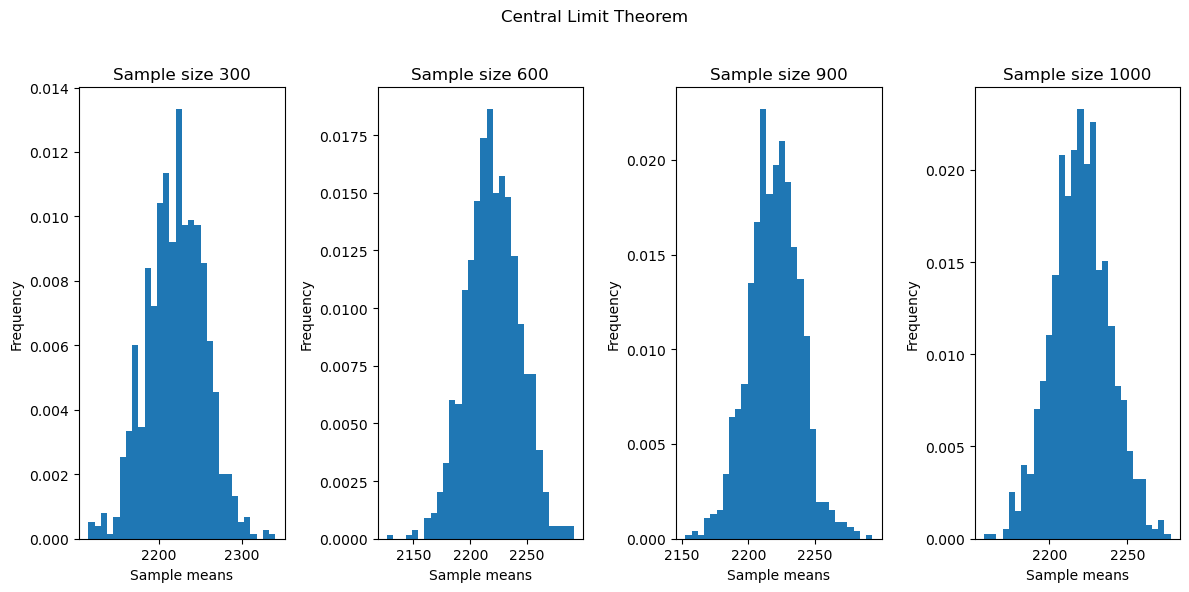

In [47]:
pop_price=df['price']
sam_price=[300,600,900,1000]
num_sam=1000
    
# plot
plt.figure(figsize=(12,6))
# Iterate
for i,n in enumerate(sam_price):
    sam_means=[]
    for _ in range(num_sam):
        sample=pop_price.sample(n=n,replace=True)
        sam_means.append(np.mean(sample))
    plt.subplot(1,4,i+1)
    plt.hist(sam_means,bins=30,density=True)
    plt.title(f'Sample size {n}')
    plt.xlabel('Sample means')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.suptitle('Central Limit Theorem')
plt.subplots_adjust(top=0.85)
plt.show()

# Another Method using advanced histogram:

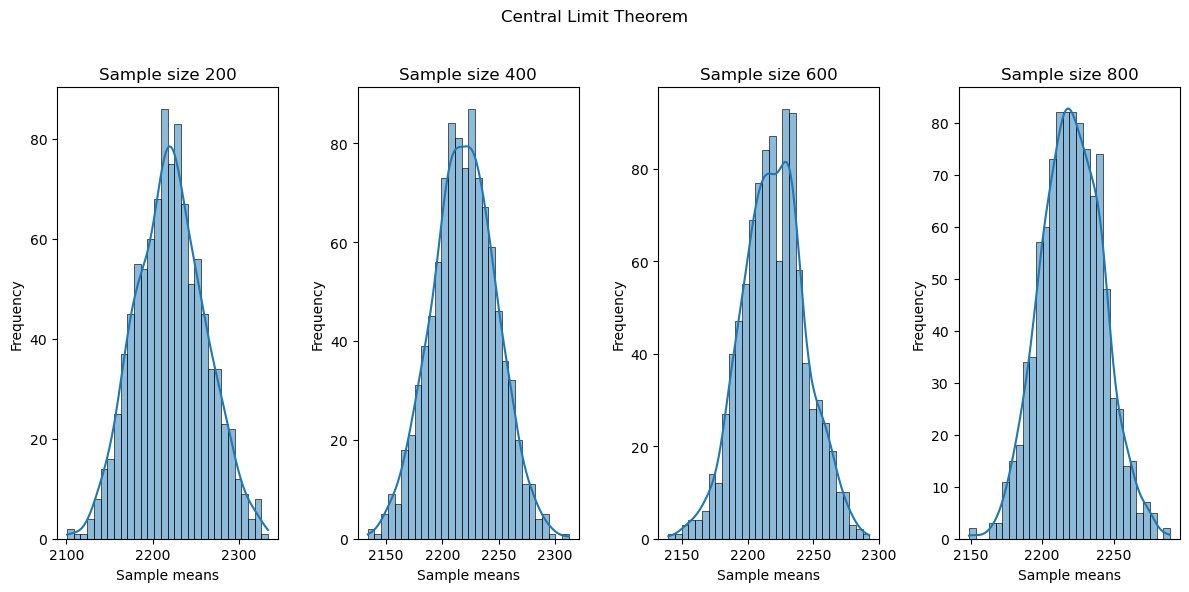

In [57]:
pop_price=df['price']
sam_price=[200,400,600,800]
num_sam=1000
    
# plot
plt.figure(figsize=(12,6))
# Iterate
for i,n in enumerate(sam_price):
    sam_means=[]
    for _ in range(num_sam):
        sample=pop_price.sample(n=n,replace=True)
        sam_means.append(np.mean(sample))
    plt.subplot(1,4,i+1)
    sns.histplot(sam_means,kde=True,bins=30)
    plt.title(f'Sample size {n}')
    plt.xlabel('Sample means')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.suptitle('Central Limit Theorem')
plt.subplots_adjust(top=0.85)
plt.show()

# b) Does the distribution of sample means approximate a normal distribution as sample size increases?
Yes, as the sample size increases, the distribution of sample means approximates a normal distribution.When the mean is calculated for 1000 iterations
with increasing sample sizes, the histograms display a bell-shaped curve, characteristic of a normal distribution.This shows in the 
sample sizes, such as 200,400,and 800.

# c) Check if the properties of Central Limit Theorem for the samples is satisfied:
Yes, the samples satisfy the properties of the Central Limit Theorem. The sample means approximate a normal distribution as the sample size increases,
irrespective of the population's original distribution. This can be observed for sample sizes such as 200, 400, and 800, where the distribution of
sample means shows a bell-shaped curve.

# Business Objective -4
# Analysing Advertising Budjeting for Premium Computers by Identifying Budget Allocation:

# Task-1

In [ ]:
H0=221.3
Ha=222.2
n=40
alpha=0.05 #LOS
LOC=95%
pop_std=74.83
# Tail type:
Right tail (Increasing)
# Statistical test type:
Z-Test   #(Because sample size is >=30 , population mean and standard deviation is known)

Ho:There is no significant difference in mean value of advertising budget is equal to 221.3
Ha:There is significant difference in mean value of advertising budget it may increase > 221.3

In [22]:
s40=df['price'].sample(n=40,random_state=6)
s40_mean=np.mean(s40)
print(s40_mean)

2208.3


In [20]:
# Given data:
pop_mean=221.3
pop_std=74.83
alpha=0.05
x_mean=2208.3
n=40

z_stat=(x_mean-pop_mean)/(pop_std/math.sqrt(n))
z_crit=norm.ppf(1-alpha)
p_val=norm.sf(abs(z_stat))
print(f'Z-Statstical value={z_stat}\nZ-critical value={z_crit}\nProbability value={p_val}')

Z-Statstical value=167.93921450633624
Z-critical value=1.6448536269514722
Probability value=0.0


# Reach the statistical conclusion:

In [25]:
if z_stat<z_crit and p_val>alpha:
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis')

Reject Null Hypothesis


# Business Decision:
There is significant difference in mean value of advertising budget it may increase > 221.3

# Business Objective-5
# Evaluate the Price Difference between Computers with and without CD Players:

# Task-2
# Is there a statistically significant difference in average price of computers with CD player and computers without CD players?
# Use 5% significant level for the test:

In [67]:
pvt=pd.pivot_table(df,index=['cd'],values=['price'],aggfunc=['mean'])
pvt

,mean
,price
cd,
no,2112.811996
yes,2342.605571


In [104]:
n1=20
n2=20
alpha=0.05
dof=n1+n2-1
print('========================Sample Mean=================')
# sample mean:
sam_mean_yes=df[df['cd']=='yes']['price'].sample(n=20,random_state=7)
mean1=sam_mean_yes.mean()
print('Sample mean of 50 samples with CD player=',mean1)

sam_mean_no=df[df['cd']=='no']['price'].sample(n=20,random_state=10)
mean2=sam_mean_no.mean()
print('Sample mean of 50 samples without CD player=',mean2)
print('========================Standard deviation=================')
# Standard deviation:
std_yes=df[df['cd']=='yes']['price'].std()
std_no=df[df['cd']=='no']['price'].std()
print('Standard deviation for yes=',std_yes,'\nStandard deviation for no=',std_no)
print('========================Critical,statistical and probability value=================')
# T-statistical value:
n=(mean1-mean2)
d=math.sqrt((std_yes**2*(n1-1)+std_no**2*(n2-1))/dof)*(math.sqrt(1/n1+1/n2))
T_stat=n/d

# T-critical value:
T_crit=t.ppf((1-alpha/2),dof)
p_val=2*t.sf(abs(T_stat),dof)
print(f'T-Statstical value={T_stat}\nT-critical value={T_crit}\nProbability value={p_val}')

print('========================Statistical Decision=================')
#Statistical Decision:
if T_stat<T_crit and p_val>alpha:
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis')

========================Sample Mean=================
Sample mean of 50 samples with CD player= 2140.3
Sample mean of 50 samples without CD player= 2132.45
========================Standard deviation=================
Standard deviation for yes= 527.447791950526 
Standard deviation for no= 603.4942370862724
========================Critical,statistical and probability value=================
T-Statstical value=0.0443731446479174
T-critical value=2.0226909200367604
Probability value=0.9648333917785479
========================Statistical Decision=================
Accept Null Hypothesis


# Business Decision:
There is no significant difference in the average price of the mean value is equal 2112.81 or 2342.60.

# Business Objective-6
# Analyse Premium Computer Pricing Strategy

# Task-3
# a) Identify price discrepency for premium computers:
# Determine if the mean prices of computers differs significantly from $2200?
# To examine this select 25 samples of premium computers randomly from the data.Assume the data is normally distributed in the population
# Use 5% Level of significance to test hypothesis

In [116]:
# Test type:
# T-Test
# Tail type:
# Two tail

# Sample mean calculation:
s25_premium=df[df['premium']=='yes'].sample(n=25,random_state=11)
price=s25_premium.price
mean_s25_pre=np.mean(price)
print('Sample mean=',mean_s25_pre)

Sample mean= 2328.36


In [128]:
price=s25_premium.price
std_pop=np.std(price)
print('Sample Standard deviation=',std_pop)

Sample Standard deviation= 685.2203663056141


In [143]:
alpha=0.05
pop_mean=2200
sam_mean=2328.36
sam_std=685.22
n=25
dof1=n-1

print('===================Critical,statistical and probability value===================')
# Caluculation of Critical and probability values:
T_stat=(sam_mean-pop_mean)/(sam_std/math.sqrt(n))
T_crit=t.ppf(1-alpha/2,dof1)
p_val=2*t.sf(abs(T_stat),dof1)
print(f'T-Statstical value={T_stat}\nT-critical value={T_crit}\nProbability value={p_val}')

print('===================Statistical Decision===================')
# Statistical Decision:
if (T_stat<T_crit) and (p_val>alpha):
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis')

===================Critical,statistical and probability value===================
T-Statstical value=0.9366334899740238
T-critical value=2.0638985616280205
Probability value=0.3582773088222706
===================Statistical Decision===================
Accept Null Hypothesis


# Interpretation: 
There is no statistical difference in the mean value of premium computers that is 2200.Sample mean was not significantly different from $2200 at
the 5% significance level.

# Task-3(cont'd)
# Analyse price disparity between premium and non-premium computers:
# Is there a significant difference in the mean price of premium and non-premium computers?
# Assume that the price are normally distributed and that the population variance are approximately equal.Use 5% significance level to test hypothesis:

In [146]:
# T-test with 2 sample:
# Tail type:
#Two tail


# Null hypothesis:
pre_pop=df.groupby('premium')['price'].agg('mean')
pre_pop

premium
no     2361.934641
yes    2204.148397
Name: price, dtype: float64

In [148]:
# Alternate hypothesis:
pre_pop_std=df.groupby('premium')['price'].agg('std')
pre_pop_std

premium
no     652.371260
yes    570.444906
Name: price, dtype: float64

In [160]:
premium_pop_mean=2204.15
nonpremium_pop_mean=2361.92
premium_pop_std=570.44
nonpremium_pop_std=652.37
n1=10
n2=10
df=n1+n2-2
alpha=0.05


# Statistical calculation:
# T-stat:

n=(premium_pop_mean-nonpremium_pop_mean)
d=math.sqrt((premium_pop_std**2*(n1-1)+nonpremium_pop_std**2*(n2-1))/df)*(math.sqrt(1/n1+1/n2))

T_stat=n/d
T_crit=t.ppf((1-alpha/2),df)
p_val=2*t.sf(abs(T_stat),df)

print('T_stat:',T_stat,'T_crit',T_crit,'P_value',p_val)


# Business Decision:
if T_stat<T_crit and p_val>alpha:
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis')

T_stat: -0.5757153488262632 T_crit 2.10092204024096 P_value 0.5719357766956059
Accept Null Hypothesis


# Interpretation:
There is no significant difference in premium and non-premium computers of mean value.It may equal to 2204.15 and 2361.92.